### PayPal case-study submission

#### 1. Importing necessary library and packages

In [196]:
# Importing necessay libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import statistics as st
warnings.filterwarnings('ignore')

In [197]:
# Reading the necessary data-set ie., pancake flipping data across days for Boris & Arielle
paypal_data = pd.read_csv('D:/Personal Documents/Job Application & switch/PayPal/data.csv')

In [198]:
# Checking sample of pancake flipping score dataset 
paypal_data.head()

,match_day,name,hand,score,attempts
0,1,Arielle,R,8,20
1,2,Arielle,R,10,20
2,3,Arielle,R,6,20
3,4,Arielle,L,4,20
4,5,Arielle,R,7,20


In [199]:
# Calculate %age score for the players ie., No. of successful flips/Total no. of flips
paypal_data['%score'] = (paypal_data['score']/paypal_data['attempts'])*100

In [200]:
# Separating the data for Arielle & Boris, creating separate datasets
arielle_data = paypal_data.loc[paypal_data['name']=="Arielle",:]
boris_data = paypal_data.loc[paypal_data['name']=="Boris",:]

In [201]:
# Checking the Arielle dataset
arielle_data.head()

,match_day,name,hand,score,attempts,%score
0,1,Arielle,R,8,20,40.0
1,2,Arielle,R,10,20,50.0
2,3,Arielle,R,6,20,30.0
3,4,Arielle,L,4,20,20.0
4,5,Arielle,R,7,20,35.0


In [202]:
# Checking the Boris dataset
arielle_data.head()

,match_day,name,hand,score,attempts,%score
0,1,Arielle,R,8,20,40.0
1,2,Arielle,R,10,20,50.0
2,3,Arielle,R,6,20,30.0
3,4,Arielle,L,4,20,20.0
4,5,Arielle,R,7,20,35.0


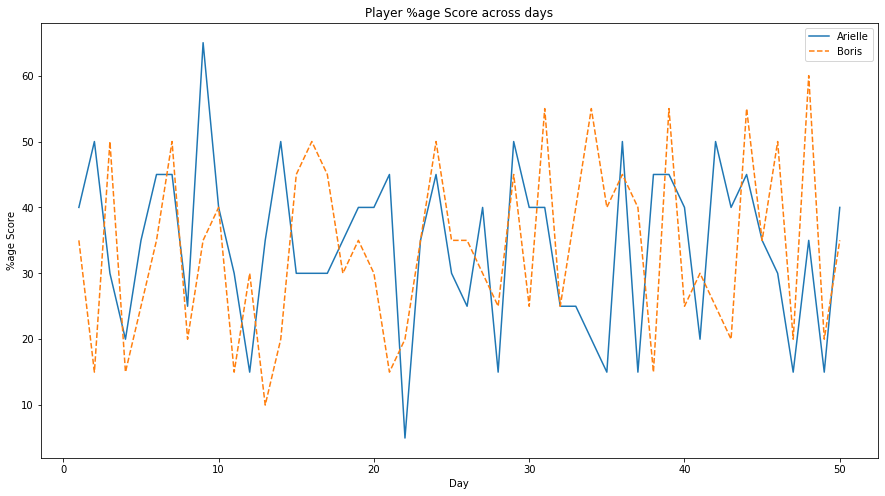

In [213]:
# Plotting the %age scores across days for Boris and Arielle
plt.figure(figsize=(15,8))
plt.plot(arielle_data['match_day'],arielle_data['%score'],label='Arielle')
plt.plot(boris_data['match_day'],boris_data['%score'],'--',label='Boris')
plt.title('Player %age Score across days')
plt.xlabel('Day')
plt.ylabel('%age Score')
plt.legend()
plt.show()

<Figure size 1440x1080 with 0 Axes>

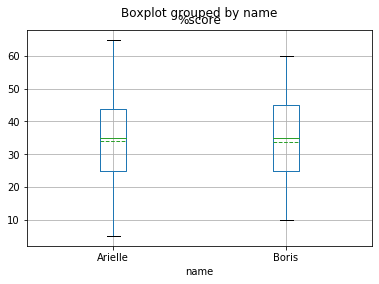

In [162]:
plt.figure(figsize=(20,15))
paypal_data.boxplot(column = '%score',by='name',meanline=True, showmeans=True, showcaps=True, 
            showbox=True, showfliers=False, return_type='axes')
plt.show()

No conclusion can be drawn, except for the fact that player performance fluctuates a lot across the 50 days

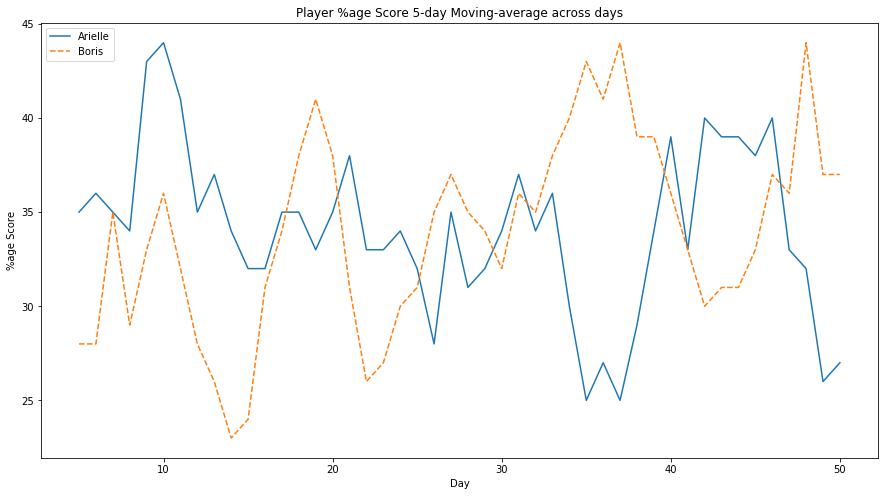

In [237]:
# Plotting the %age scores across days for Boris and Arielle
plt.figure(figsize=(15,8))
plt.plot(arielle_data['match_day'],arielle_data['%score'].rolling(5).mean(),label='Arielle')
plt.plot(boris_data['match_day'],boris_data['%score'].rolling(5).mean(),'--',label='Boris')
plt.title('Player %age Score 5-day Moving-average across days')
plt.xlabel('Day')
plt.ylabel('%age Score')
plt.legend()
plt.show()

No major conclusion can be drawn, Arielle seems to performing well intially then Boris picks up

In [238]:
# Comparing left-hand performance of players
leftscore = paypal_data.loc[(paypal_data['name']=='Boris') & (paypal_data['hand']=='L'),:].merge(paypal_data.loc[(paypal_data['name']=='Arielle') & (paypal_data['hand']=='L'),:],on='match_day')

In [239]:
leftscore = leftscore.reset_index()

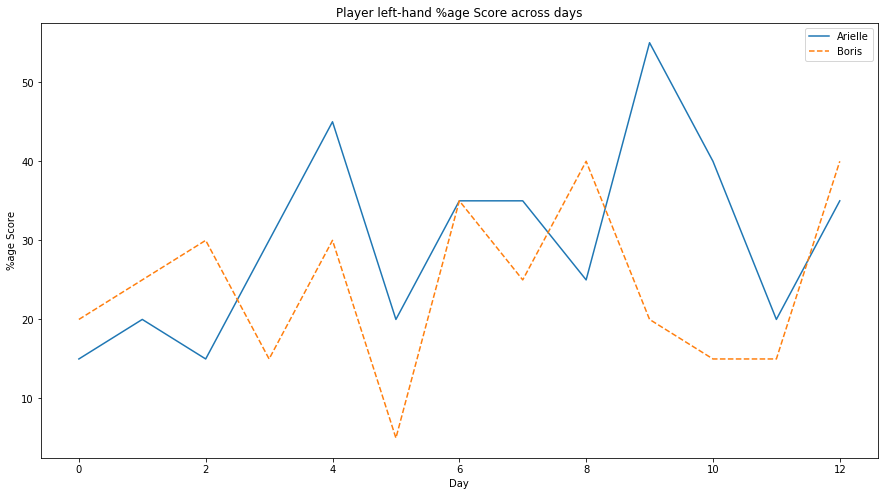

In [240]:
# Plotting the left-hand %age scores across days for Boris and Arielle
plt.figure(figsize=(15,8))
plt.plot(leftscore['index'],leftscore['%score_x'],label='Arielle')
plt.plot(leftscore['index'],leftscore['%score_y'],'--',label='Boris')
plt.title('Player left-hand %age Score across days')
plt.xlabel('Day')
plt.ylabel('%age Score')
plt.legend()
plt.show()

Nothing conclusive, very few-times Arielle has better left-hand performance than Boris, but Boris also has instances where he has outperformed Arielle in right-hand pancake flipping

In [242]:
# Comparing right-hand performance of players
rightscore = paypal_data.loc[(paypal_data['name']=='Boris') & (paypal_data['hand']=='R'),:].merge(paypal_data.loc[(paypal_data['name']=='Arielle') & (paypal_data['hand']=='R'),:],on='match_day')

In [243]:
rightscore = rightscore.reset_index()

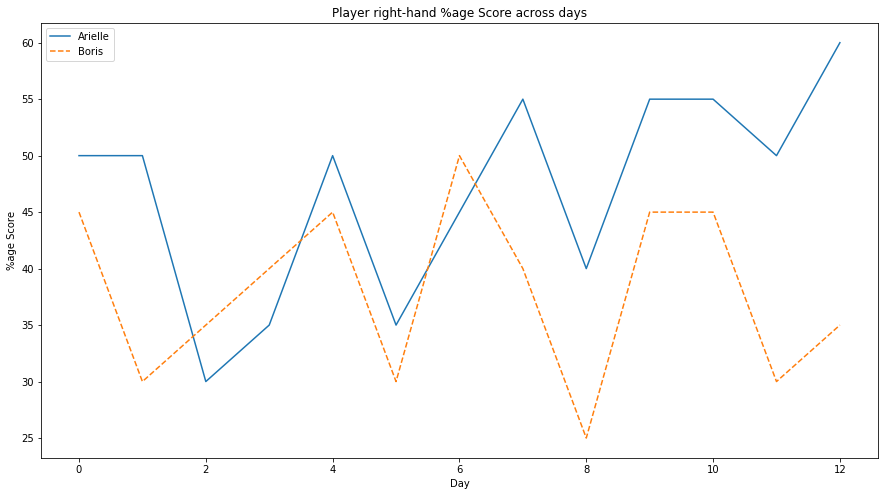

In [244]:
# Plotting the left-hand %age scores across days for Boris and Arielle
plt.figure(figsize=(15,8))
plt.plot(rightscore['index'],rightscore['%score_x'],label='Arielle')
plt.plot(rightscore['index'],rightscore['%score_y'],'--',label='Boris')
plt.title('Player right-hand %age Score across days')
plt.xlabel('Day')
plt.ylabel('%age Score')
plt.legend()
plt.show()

Boris seems for most of the time better right-hand performance than Arielle

<Figure size 1440x1080 with 0 Axes>

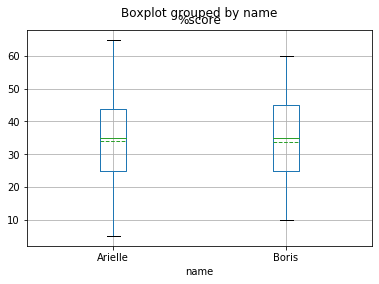

In [162]:
plt.figure(figsize=(20,15))
paypal_data.boxplot(column = '%score',by='name',meanline=True, showmeans=True, showcaps=True, 
            showbox=True, showfliers=False, return_type='axes')
plt.show()

In [163]:
paypal_agg = paypal_data.loc[:,('name','hand','score','attempts')].groupby(by=['name','hand'],axis=0).sum()

In [164]:
paypal_agg.reset_index()

,name,hand,score,attempts
0,Arielle,L,72,300
1,Arielle,R,269,700
2,Boris,L,199,700
3,Boris,R,139,300


In [165]:
paypal_count = paypal_data.loc[:,('name','hand','match_day')].groupby(by=['name','hand'],axis=0).count().reset_index()

In [166]:
paypal_count

,name,hand,match_day
0,Arielle,L,15
1,Arielle,R,35
2,Boris,L,35
3,Boris,R,15


In [167]:
paypal_count.rename(columns = {'match_day':'day_count'}, inplace = True)

In [168]:
paypal_count

,name,hand,day_count
0,Arielle,L,15
1,Arielle,R,35
2,Boris,L,35
3,Boris,R,15


In [169]:
paypal_agg = paypal_agg.merge(paypal_count, left_on=['name','hand'], right_on=['name','hand'])

In [170]:
paypal_agg['%score'] = round((paypal_agg['score']/paypal_agg['attempts'])*100,2)

In [171]:
# Calculating player & hand-wise performance
paypal_agg

,name,hand,score,attempts,day_count,%score
0,Arielle,L,72,300,15,24.00
1,Arielle,R,269,700,35,38.43
2,Boris,L,199,700,35,28.43
3,Boris,R,139,300,15,46.33


#### 2. Checking for the preferred hand & handedness (dominant hand) of both the players

###### a) Preferred or Most-used hand

In [249]:
paypal_count_max = paypal_agg.loc[:,('name','day_count')].groupby(by=['name']).max().reset_index()

In [250]:
paypal_count_max

,name,day_count
0,Arielle,35
1,Boris,35


In [251]:
# Finding out the hand most used by each player
paypal_agg.loc[paypal_agg['day_count']==35,('name','hand')]

,name,hand
1,Arielle,R
2,Boris,L


Preferred (most-used) hand for the players are:

- Arielle - Right hand

- Boris - Left hand

##### b) Checking for the dominant hand or handedness of both the players i.e., the hand with which they have better performance

In [252]:
paypal_count_max = paypal_agg.loc[:,('name','%score')].groupby(by=['name']).max().reset_index()

In [253]:
list(paypal_count_max['%score'])[0]

38.43

In [254]:
# Finding out the dominant hand for Arielle
paypal_agg.loc[paypal_agg['%score'] == list(paypal_count_max['%score'])[0],('name','hand')]

,name,hand
1,Arielle,R


In [255]:
# Finding out the dominant hand for Boris
paypal_agg.loc[paypal_agg['%score'] == list(paypal_count_max['%score'])[1],('name','hand')]

,name,hand
3,Boris,R


Dominant hand for the players are:

- Arielle - Right hand

- Boris - Right hand

__Observation:__ Arielle seems to be using her dominant hand i.e., Right, but Boris is mainly using his lef-hand which is not the dominant hand for him

__Conclusion:__ Arielle seems to be using her dominant hand but Boris is experimenting or trying to improve his performance with his weaker hand

#### 3. Analyse the overall player performance

In [179]:
paypal_name = paypal_agg.groupby(by='name').sum().reset_index()

In [180]:
paypal_name['%score'] = (paypal_name['score']/paypal_name['attempts'])*100

In [181]:
paypal_name

,name,score,attempts,day_count,%score
0,Arielle,341,1000,50,34.1
1,Boris,338,1000,50,33.8


In [182]:
print('Arielle has a score of: {0} that is higher than score of Boris: {1} by {2}'.format(paypal_name.loc[0,'%score'],round(paypal_name.loc[1,'%score'],2),round(paypal_name.loc[0,'%score']-paypal_name.loc[1,'%score'],2)))

Arielle has a score of: 34.1 that is higher than score of Boris: 33.8 by 0.3


From this it seems Arielle score is marginally higher than that of Boris

__Hypothesis testing to check if Boris & Arielle have different overall performance__

__H0:__ Boris overall score = Arielle overall score

__Ha:__ Boris overall score != Arielle overall score

Since we don't know the population statistics we will assume unequal variance

In [183]:
#perform two sample t-test with unequal variances
stats.ttest_ind(a=arielle_data['%score'], b=boris_data['%score'], equal_var=False)

Ttest_indResult(statistic=0.1175313817037819, pvalue=0.9066804548784895)

As p-value (0.9066)>0.05, We cannot reject the null-hypothesis, hence it seems Boris and Arielle have same overall score/performance

#### 4. Analyse the hand-wise player performance

##### a) Let's first analyse the left-hand performance of the players

In [75]:
paypal_agg

,name,hand,score,attempts,day_count,%score
0,Arielle,L,72,300,15,24.00
1,Arielle,R,269,700,35,38.43
2,Boris,L,199,700,35,28.43
3,Boris,R,139,300,15,46.33


In [85]:
paypal_left = paypal_agg.loc[paypal_agg['hand']=="L",:].reset_index(drop=True)

In [86]:
paypal_left

,name,hand,score,attempts,day_count,%score
0,Arielle,L,72,300,15,24.00
1,Boris,L,199,700,35,28.43


<Figure size 1440x1080 with 0 Axes>

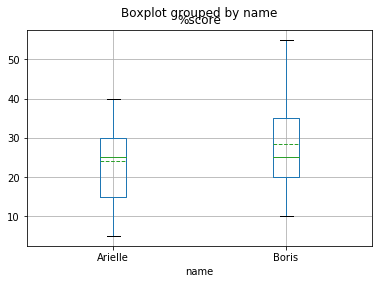

In [87]:
plt.figure(figsize=(20,15))
paypal_data.loc[paypal_data['hand']=='L',:].boxplot(column = '%score',by='name',meanline=True, showmeans=True, showcaps=True, 
            showbox=True, showfliers=False, return_type='axes')
plt.show()

In [88]:
print('Boris has a score of: {0} that is higher than score of Arielle: {1} by {2}'.format(paypal_left.loc[1,'%score'],round(paypal_left.loc[0,'%score'],2),round(paypal_left.loc[1,'%score']-paypal_left.loc[0,'%score'],2)))

Boris has a score of: 28.43 that is higher than score of Arielle: 24.0 by 4.43


From this it seems Boris has better left-hand performance than Arielle

__Hypothesis testing to check if Boris has better left-hand score than Arielle__

__H0:__ Boris score = Arielle score

__Ha:__ Boris score != Arielle score

In [256]:
#perform two sample t-test with unequal variances
t_stat,pvalue = stats.ttest_ind(a=list(boris_data.loc[boris_data['hand']=='L','%score']),b=list(arielle_data.loc[arielle_data['hand']=='L','%score']), equal_var=False)

In [257]:
t_stat

1.3768115824020626

In [258]:
pvalue/2

0.08969536040204802

As p-value (0.089)>0.05, We cannot reject the null-hypothesis, hence it seems Boris and Arielle have same left-hand score/performance

##### b) Let's now analyse the right-hand performance of the players

In [259]:
paypal_agg

,name,hand,score,attempts,day_count,%score
0,Arielle,L,72,300,15,24.00
1,Arielle,R,269,700,35,38.43
2,Boris,L,199,700,35,28.43
3,Boris,R,139,300,15,46.33


In [260]:
paypal_right = paypal_agg.loc[paypal_agg['hand']=="R",:].reset_index(drop=True)

In [261]:
paypal_right

,name,hand,score,attempts,day_count,%score
0,Arielle,R,269,700,35,38.43
1,Boris,R,139,300,15,46.33


<Figure size 1440x1080 with 0 Axes>

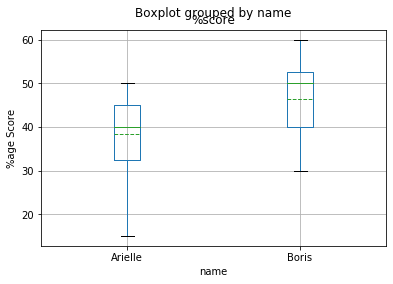

In [262]:
plt.figure(figsize=(20,15))
paypal_data.loc[paypal_data['hand']=='R',:].boxplot(column = '%score',by='name',meanline=True, showmeans=True, showcaps=True, 
            showbox=True, showfliers=False, return_type='axes')
plt.ylabel('%age Score')
plt.show()

In [263]:
print('Boris has a right hand score of: {0} that is higher than score of Arielle: {1} by {2}'.format(paypal_right.loc[1,'%score'],round(paypal_right.loc[0,'%score'],2),round(paypal_right.loc[1,'%score']-paypal_right.loc[0,'%score'],2)))

Boris has a right hand score of: 46.33 that is higher than score of Arielle: 38.43 by 7.9


From this it seems Boris has better left-hand performance than Arielle

In [265]:
#perform two sample t-test with unequal variances
t_stat,pvalue = stats.ttest_ind(a=list(arielle_data.loc[arielle_data['hand']=='R','%score']), b=list(boris_data.loc[boris_data['hand']=='R','%score']), equal_var=False)

In [266]:
t_stat

-2.7377202337358626

In [268]:
pvalue

0.01001878626678504

In [267]:
pvalue/2

0.00500939313339252

As p-value (0.010)<0.05, We can reject the null-hypothesis, hence Arielle and Boris don't have the same right-hand score/performance

For Null-hypothesis that Boris-performance>Arielle performance we will have to check value of p-value/2 ie., (0.010018/2)=0.0050009, which is again less than 0.05, hence it seems Boris has better performance on right-hand

__Final analysis:__
- With the sample presented to us for Arielle and Boris pan-cake flipping performance across 50 days it seems that they have similar performance, ~34%
- But when we analyse the data hand-wise we realise:
    - Right-hand: Boris has better right
    - Left-hand: Both players have same performance with their left-hand
- Since Boris has been using his __left-hand more which isn't his dominant hand__, thus his overall performance has come down because of which both the players have similar score across the 50 days
- If Boris starts using his right-hand (dominant-hand) more, he might have better performance than Arielle 

#### 5. Scenario: Boris starts utilising his dominant hand 

In [117]:
paypal_agg

,name,hand,score,attempts,day_count,%score
0,Arielle,L,72,300,15,24.00
1,Arielle,R,269,700,35,38.43
2,Boris,L,199,700,35,28.43
3,Boris,R,139,300,15,46.33


In [124]:
boris_data = paypal_agg.loc[paypal_agg['name']=='Boris',:].reset_index(drop=True)

In [125]:
boris_data

,name,hand,score,attempts,day_count,%score
0,Boris,L,199,700,35,28.43
1,Boris,R,139,300,15,46.33


In [129]:
boris_score_new = ((boris_data.loc[0,'day_count']*boris_data.loc[1,'%score'])+(boris_data.loc[1,'day_count']*boris_data.loc[0,'%score']))/(boris_data.loc[0,'day_count']+boris_data.loc[1,'day_count'])

In [130]:
boris_score_new

40.96

This is higher than Arielle's score of 34.1 by 6 points

In [133]:
paypal_data

,match_day,name,hand,score,attempts,%score
0,1,Arielle,R,8,20,40.0
1,2,Arielle,R,10,20,50.0
2,3,Arielle,R,6,20,30.0
3,4,Arielle,L,4,20,20.0
4,5,Arielle,R,7,20,35.0
...,...,...,...,...,...,...
95,46,Boris,R,10,20,50.0
96,47,Boris,L,4,20,20.0
97,48,Boris,R,12,20,60.0
98,49,Boris,L,4,20,20.0


In [135]:
boris_left_sd = st.stdev(paypal_data.loc[(paypal_data['hand']=='L') & (paypal_data['name']=='Boris'),'%score'])
boris_right_sd = st.stdev(paypal_data.loc[(paypal_data['hand']=='R') & (paypal_data['name']=='Boris'),'%score'])

In [145]:
boris_sd_new = ((15*((boris_left_sd**2)+(boris_score_new-28.43)**2)+35*((boris_left_sd**2)+(boris_score_new-46.33)**2))/(15+35))**(0.5)

In [146]:
boris_sd_new

13.640660270127762

In [148]:
arielle_sd = st.stdev(paypal_data.loc[(paypal_data['name']=='Boris'),'%score'])

In [150]:
t_stats = (40.96-34.10)/((((boris_sd_new**2)/50)+((arielle_sd**2)/50))**(0.5))

In [190]:
t_stats

2.559815469417568

__Hypothesis testing to check if Boris has better score than Arielle__

__H0:__ Boris score = Arielle score

__Ha:__ Boris score > Arielle score

In [232]:
# T-test assuming
(stats.t.sf(abs(t_stats), df=98))/2

0.003000144868842545

p-value of two-sample t-test (0.0034) is less than 0.05, hence both the scores are not equal

We can say Boris's score is greater than that of Arielle

#### __Conclusion:__ If Boris uses his dominant hand more or as his preferred hand then he is better pan-cake flipper than Arielle